In [1]:
print("Hello, world!")


Hello, world!


In [2]:
price = 45.7
print(price)


45.7


In [3]:
prices = [43.2, 44.8, 45.1, 42.9, 46.0]
print(prices)


[43.2, 44.8, 45.1, 42.9, 46.0]


In [4]:
average = sum(prices) / len(prices)
print("Average price:", average)


Average price: 44.4


In [5]:
import pandas as pd

df = pd.read_csv("sample_pjm_prices.csv")
print(df.head())


       date  node  DA_price  RT_price
0  6/1/2024  PECO     53.82     55.02
1  6/2/2024  PECO     49.89     56.61
2  6/3/2024  PECO     54.34     51.41
3  6/4/2024  PECO     49.75     49.30
4  6/5/2024  PECO     44.48     45.71


In [6]:
df['spread'] = df['DA_price'] - df['RT_price']
print(df[['date', 'node', 'spread']].head())


       date  node  spread
0  6/1/2024  PECO   -1.20
1  6/2/2024  PECO   -6.72
2  6/3/2024  PECO    2.93
3  6/4/2024  PECO    0.45
4  6/5/2024  PECO   -1.23


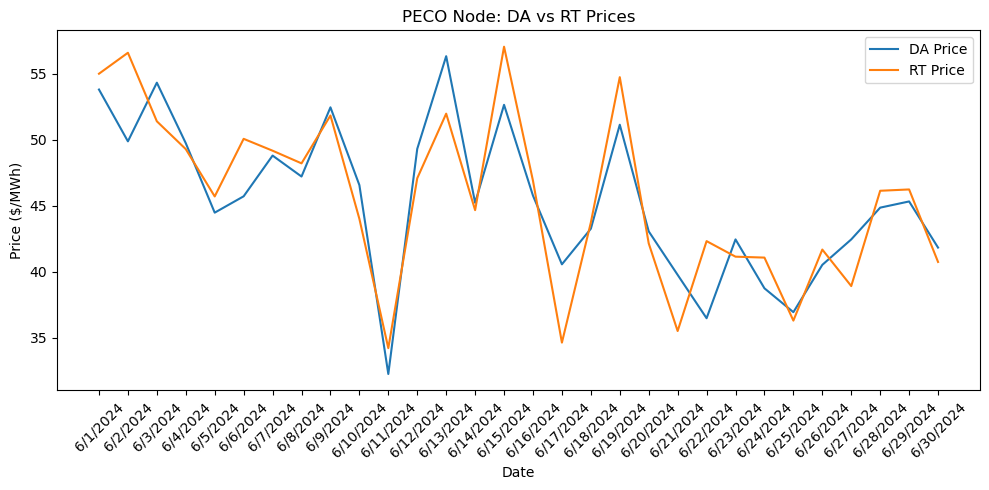

In [7]:
import matplotlib.pyplot as plt

# Filter for just PECO
peco = df[df['node'] == 'PECO']

# Plot
plt.figure(figsize=(10, 5))
plt.plot(peco['date'], peco['DA_price'], label='DA Price')
plt.plot(peco['date'], peco['RT_price'], label='RT Price')
plt.xticks(rotation=45)
plt.title('PECO Node: DA vs RT Prices')
plt.xlabel('Date')
plt.ylabel('Price ($/MWh)')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
volatility = df.groupby('node')['spread'].std().reset_index()
volatility = volatility.sort_values(by='spread', ascending=False)
print(volatility)


      node    spread
2      PPL  3.162614
0     PECO  2.983977
1  PENELEC  2.757228


In [9]:
df['signal'] = df['spread'].apply(lambda x: 'buy' if x > 5 else 'hold')
print(df[['date', 'node', 'DA_price', 'RT_price', 'spread', 'signal']].head(10))


        date  node  DA_price  RT_price  spread signal
0   6/1/2024  PECO     53.82     55.02   -1.20   hold
1   6/2/2024  PECO     49.89     56.61   -6.72   hold
2   6/3/2024  PECO     54.34     51.41    2.93   hold
3   6/4/2024  PECO     49.75     49.30    0.45   hold
4   6/5/2024  PECO     44.48     45.71   -1.23   hold
5   6/6/2024  PECO     45.72     50.08   -4.36   hold
6   6/7/2024  PECO     48.81     49.18   -0.37   hold
7   6/8/2024  PECO     47.22     48.22   -1.00   hold
8   6/9/2024  PECO     52.47     51.85    0.62   hold
9  6/10/2024  PECO     46.57     44.01    2.56   hold


In [10]:
df['PnL'] = df.apply(lambda row: row['RT_price'] - row['DA_price'] if row['signal'] == 'buy' else 0, axis=1)


In [11]:
# Total and average PnL
print("Total PnL:", df['PnL'].sum())
print("Average PnL per trade:", df[df['signal'] == 'buy']['PnL'].mean())
print("Number of trades:", df[df['signal'] == 'buy'].shape[0])


Total PnL: -11.120000000000005
Average PnL per trade: -5.560000000000002
Number of trades: 2


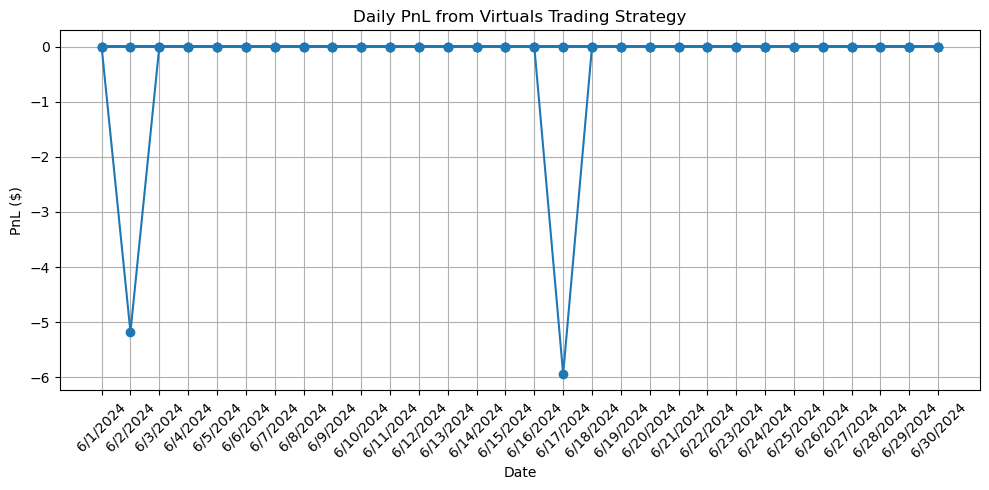

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['PnL'], marker='o')
plt.title('Daily PnL from Virtuals Trading Strategy')
plt.xlabel('Date')
plt.ylabel('PnL ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


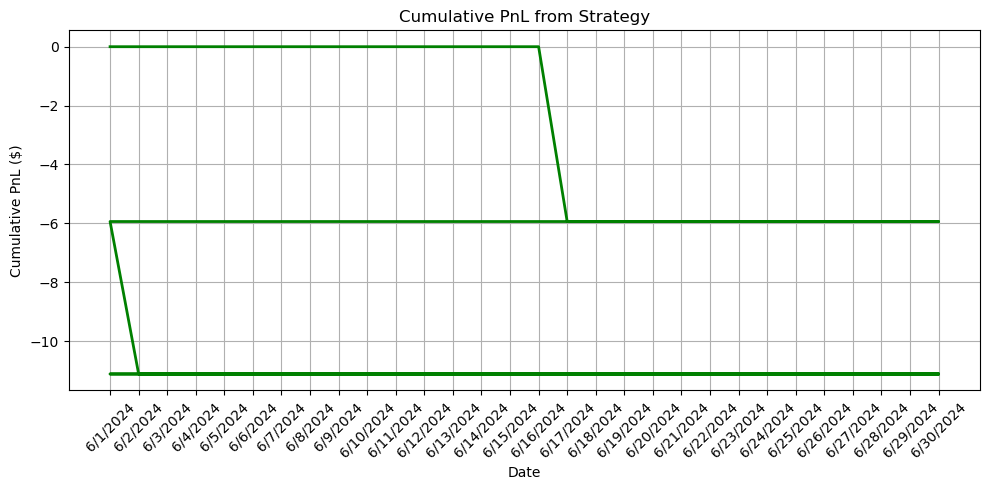

In [13]:
df['cumulative_PnL'] = df['PnL'].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['cumulative_PnL'], color='green', linewidth=2)
plt.title('Cumulative PnL from Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
